<a href="https://colab.research.google.com/github/justintam5/Roboto/blob/master/Roboto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import datasets, layers, models,optimizers
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import tensorboardcolab
BS = 10
EPOCHS = 10

In [ ]:
#!pip install -q tf-nightly-2.0-preview
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
logdir = './log/{}'.format(time.time())
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/data_Roboto/DATA_v2.zip (Unzipped Files)/DATA_v2/data_file.csv',names=["speed", 'time', 'image'])
#dataset = np.delete(dataset.values, np.s_[4000:], 0)
dataset = pd.DataFrame(dataset, columns=["speed", 'time', 'image'])

rows=dataset["speed"]!='False'
df=dataset[rows]

y = df.iloc[:, 0].values
y = pd.to_numeric(y)
y = (y+160)/320
x_labels = df.iloc[:, 2].values

print(y)
print(x_labels)


[0.37784318 0.42554746 0.42665502 ... 0.22127111 0.28442824 0.45533317]
[' image_0.png' ' image_1.png' ' image_2.png' ... ' image_7994.png'
 ' image_7995.png' ' image_7996.png']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_labels, y, test_size=0.2, random_state=52)
#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [ ]:
def generator(x, y):
  while True:
    img = []
    label = []
    for i in range(BS):
      img.append(cv2.imread("/content/drive/My Drive/data_Roboto/DATA_v2.zip (Unzipped Files)/DATA_v2/"+x[i].replace(" ", ""))/255)
      label.append(y[i])
    yield (np.array(img), label)


In [ ]:

func = 'relu'
model = models.Sequential()
#model.add(layers.InputLayer(input_shape=(160, 320, 3)))
model.add(layers.Dropout(0.2,  input_shape=(160, 320, 3)))
model.add(layers.Conv2D(64, (10,10), activation=func, padding='same'))
model.add(layers.Conv2D(32, (10, 10), activation=func, padding='same', input_shape=(160, 320, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (10, 10), activation=func, padding='same'))
model.add(layers.Conv2D(32, (10, 10), activation=func, padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(8, (5,5), activation=func, padding='same'))
model.add(layers.Conv2D(8, (5,5), activation=func, padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(320, activation=func))
model.add(layers.Dense(1, activation='linear'))

sgd = optimizers.SGD(lr=0.001, momentum = 0.99, decay=0.01)
model.compile(optimizer=sgd, loss='mean_absolute_error')

In [ ]:


history = model.fit_generator(generator(x_train, y_train), steps_per_epoch=len(x_train)//BS, validation_data=generator(x_test, y_test), validation_steps = len(x_test)//BS, epochs=EPOCHS)


NameError: ignored

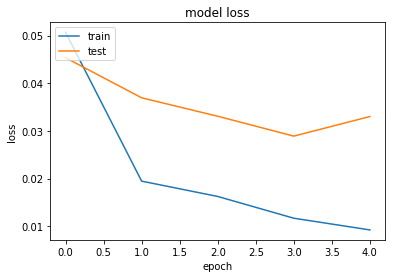

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 160, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 160, 320, 64)      19264     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 320, 32)      204832    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 160, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 160, 32)       102432    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 80, 160, 32)       102432    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 80, 32)        0

In [ ]:
%tensorboard --logdir ./log

